Image Classification with the Cifar10 Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

Pulling the data from the Cifar10 dataset and splitting into train/test sets

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
print("x_train:",  x_train.shape)
print("x_test:",  x_test.shape)
print("y_train:",  y_train.shape)
print("y_test:",  y_test.shape)

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Creating a method to easily display an image and its assigned class

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

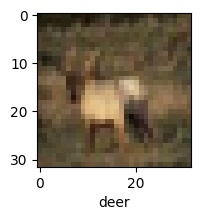

In [35]:
plot_sample(x_train, y_train, 3)

In [11]:
x_train = x_train / 255
x_test = x_test / 255

Defining the model using tensorflow keras and training it for 10 epochs

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

c:\Users\Rohan Parekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2428 - loss: 2.0877
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4416 - loss: 1.5637
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5164 - loss: 1.3784
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5570 - loss: 1.2643
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5929 - loss: 1.1643
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6222 - loss: 1.0785
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6518 - loss: 1.0018
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6749 - loss: 0.9433
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6973 - loss: 0.8791
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7194 - loss: 0.8237


Running the model on the test set 

In [13]:
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70      1000
           1       0.79      0.69      0.74      1000
           2       0.62      0.49      0.55      1000
           3       0.49      0.50      0.49      1000
           4       0.59      0.54      0.56      1000
           5       0.61      0.48      0.54      1000
           6       0.85      0.62      0.72      1000
           7       0.45      0.88      0.60      1000
           8       0.91      0.57      0.70      1000
           9       0.65      0.78      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.63     10000
weighted avg       0.66      0.63      0.63     10000



In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Displaying a picture and the model's guess

Model guesses: ship


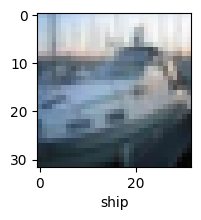

In [39]:
plot_sample(x_test, y_test, 2)
guess = classes[y_classes[2]]
print("Model guesses: " + guess)